In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [42]:
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(48000, 28, 28, 1) (48000,)
(10000, 28, 28, 1) (10000,)


In [6]:
# Normalize images and add channel dimension
train_images = train_images[..., np.newaxis] / 255.0  # Normalize training images and add channel dimension using np.newaxis to convert grayscale images from shape (28, 28) to (28, 28, 1), necessary for CNN input.
test_images = test_images[..., np.newaxis] / 255.0    # Normalize test images and add channel dimension using np.newaxis to convert grayscale images from shape (28, 28) to (28, 28, 1), necessary for CNN input.

In [7]:
# Split train set for training and validation
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [43]:
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)
print(val_images.shape,val_labels.shape)

(48000, 28, 28, 1) (48000,)
(10000, 28, 28, 1) (10000,)
(12000, 28, 28, 1) (12000,)


In [8]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


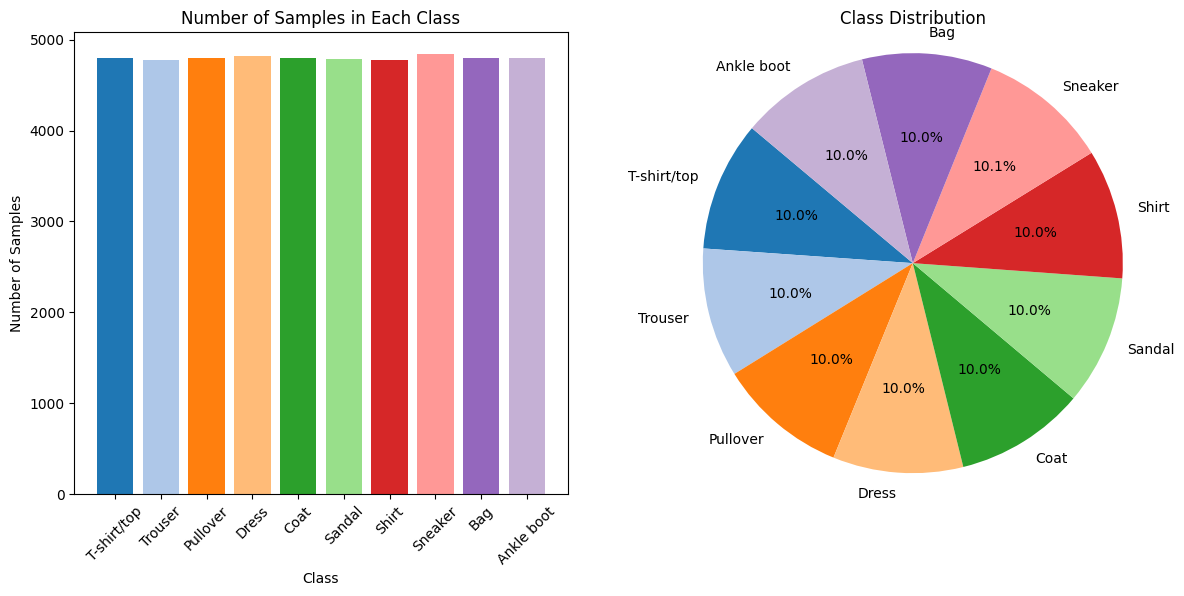

In [9]:
# Colors for consistent visualization
colors = plt.cm.tab20.colors  # Use tab20 colormap for consistent colors

# Visualization: Class distribution
plt.figure(figsize=(14, 6))

# Bar chart for class distribution
plt.subplot(1, 2, 1)
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(class_names, counts, color=colors)  # Bar chart for class distribution
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Samples in Each Class')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Pie chart for class distribution
plt.subplot(1, 2, 2)
plt.pie(counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=colors)  # Pie chart for class distribution
plt.axis('equal')  # Equal aspect ratio for pie chart
plt.title('Class Distribution')

plt.show()

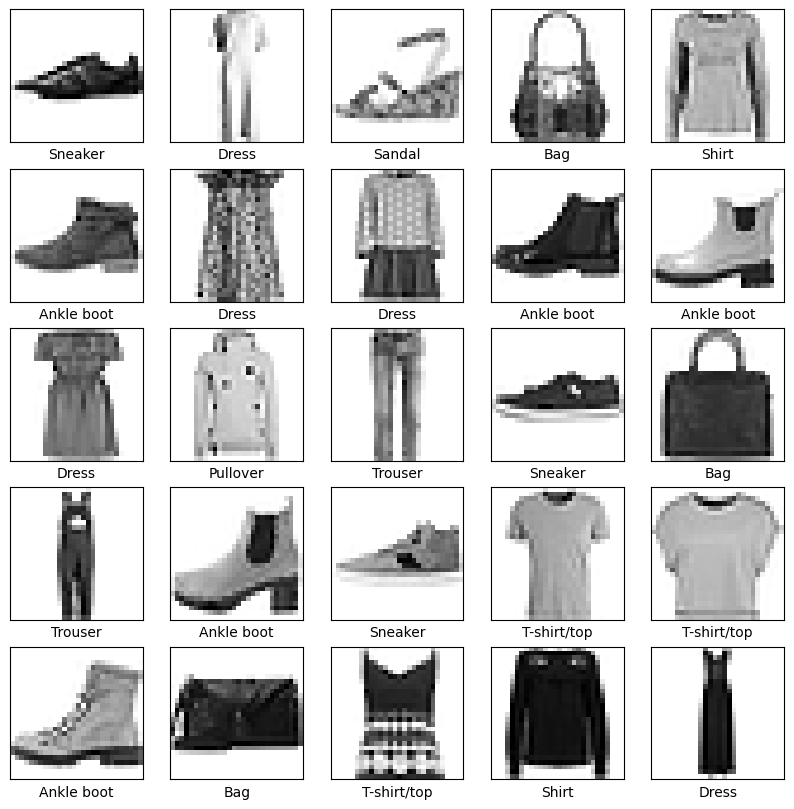

In [10]:
# Visualization: Some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)  # Display image
    plt.xlabel(class_names[train_labels[i]])  # Display label
plt.show()


In [11]:
# Define the embedding dimension
embedding_dim = 64

# Define the model
input_layer = Input(shape=(28, 28, 1))  # Input layer with shape (28, 28, 1) for grayscale images
x = Conv2D(32, (3, 3), activation='relu')(input_layer)  # First convolutional layer with 32 filters of size 3x3
x = MaxPooling2D((2, 2))(x)  # Max pooling layer with pool size 2x2
x = Conv2D(64, (3, 3), activation='relu')(x)  # Second convolutional layer with 64 filters of size 3x3
x = MaxPooling2D((2, 2))(x)  # Max pooling layer with pool size 2x2
x = Flatten()(x)  # Flatten layer to convert 2D matrix to a vector
embedding_output = Dense(embedding_dim, activation='linear', name='embedding_layer')(x)  # Embedding layer with linear activation
output_layer = Dense(10, activation='softmax')(embedding_output)  # Output layer with 10 units for 10 classes and softmax activation

model = Model(inputs=input_layer, outputs=output_layer)  # Define the model with input and output layers


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and sparse categorical cross-entropy loss

In [13]:
# Print the model summary
model.summary()  # Print model summary to display architecture and parameters

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Dense)         │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(train_images, train_labels, epochs=40, batch_size=16, validation_data=(val_images, val_labels))  # Train the model for 10 epochs with batch size of 64

Epoch 1/40
  86/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4400 - loss: 1.6020

W0000 00:00:1718454872.169951      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2991/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.5818

W0000 00:00:1718454878.095104      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7914 - loss: 0.5814 - val_accuracy: 0.8772 - val_loss: 0.3396
Epoch 2/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8846 - loss: 0.3198 - val_accuracy: 0.8878 - val_loss: 0.2993
Epoch 3/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9018 - loss: 0.2680 - val_accuracy: 0.8957 - val_loss: 0.2863
Epoch 4/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9094 - loss: 0.2471 - val_accuracy: 0.8962 - val_loss: 0.2995
Epoch 5/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9200 - loss: 0.2195 - val_accuracy: 0.9068 - val_loss: 0.2582
Epoch 6/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9268 - loss: 0.1972 - val_accuracy: 0.9078 - val_loss: 0.2671
Epoch 7/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9292 - loss: 0.1866 - val_accuracy: 0.9061 - val_loss: 0.2694
Epoch 8/40
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9347 - loss: 0.1761 - val_accurac

In [15]:
# Create a new model that outputs the embeddings
embedding_model = Model(inputs=model.input, outputs=model.get_layer('embedding_layer').output)  # Model for extracting embeddings

In [16]:
# Generate embeddings for the test images
test_embeddings = embedding_model.predict(test_images)  # Generate embeddings for test images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
# Function to find the most similar items
def recommend(item_index, num_recommendations=5):
    item_embedding = test_embeddings[item_index]  # Get the embedding for the specified item
    distances = np.linalg.norm(test_embeddings - item_embedding, axis=1)  # Compute distances to all other embeddings
    recommendations = np.argsort(distances)[:num_recommendations]  # Get indices of the closest items
    return recommendations

In [19]:
# Function to display recommendations
def display_recommendations(item_index, num_recommendations=5):
    recommended_indices = recommend(item_index, num_recommendations)  # Get recommendations

    # Plot the query image and its recommendations
    plt.figure(figsize=(10, 2))
    plt.subplot(1, len(recommended_indices) + 1, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[item_index].squeeze(), cmap=plt.cm.binary)  # Display query image
    plt.xlabel("Query")

    for i, rec_index in enumerate(recommended_indices):
        plt.subplot(1, len(recommended_indices) + 1, i + 2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[rec_index].squeeze(), cmap=plt.cm.binary)  # Display recommended image
        plt.xlabel(f"Rec {i+1}")

    plt.show()

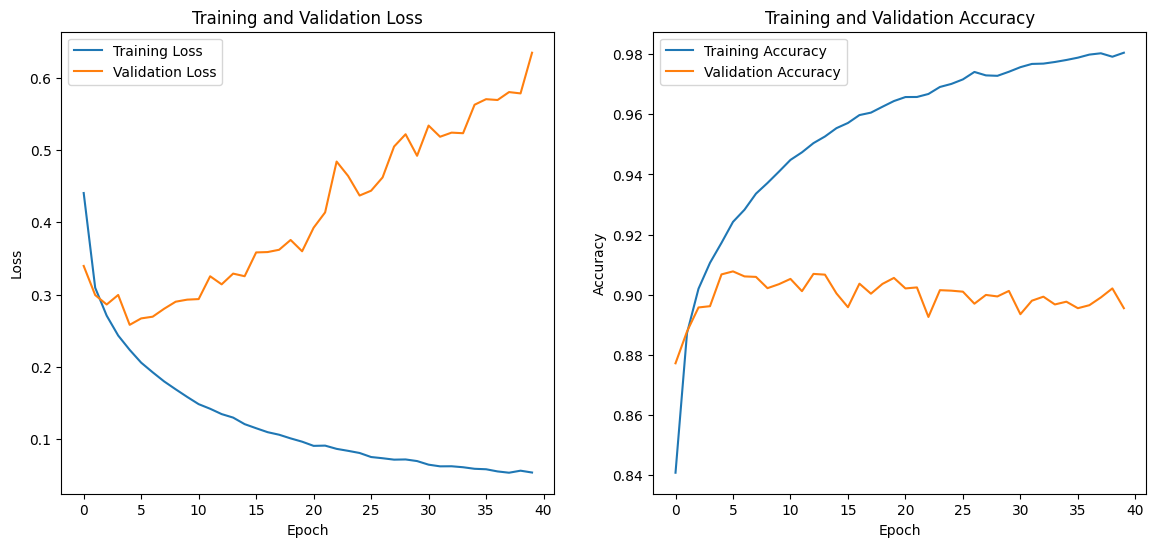

In [20]:
# Visualization: Training history
plt.figure(figsize=(14, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)  # Evaluate model on test set
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 - 1s - 3ms/step - accuracy: 0.8884 - loss: 0.7328
Test Loss: 0.7328023910522461
Test Accuracy: 0.8884000182151794


W0000 00:00:1718455179.412171      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


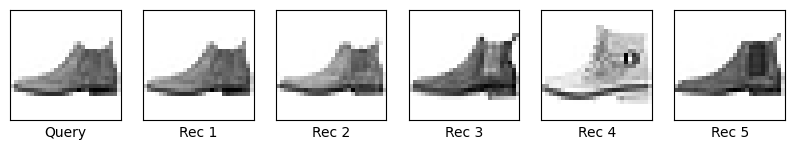

In [27]:
# Example: Recommend items similar to the first item in the test set
display_recommendations(item_index=0, num_recommendations=5)  

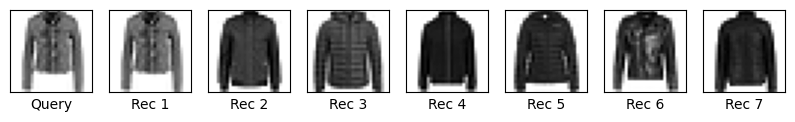

In [29]:
display_recommendations(item_index=10, num_recommendations=7)  

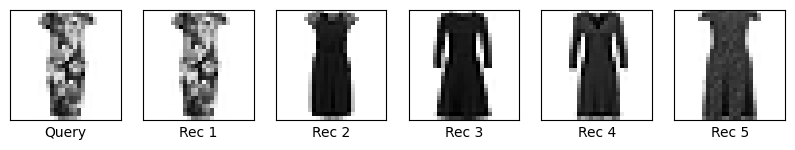

In [24]:
display_recommendations(item_index=100, num_recommendations=5)  

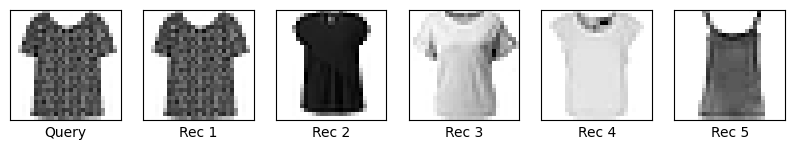

In [31]:
display_recommendations(item_index=1000, num_recommendations=5)  

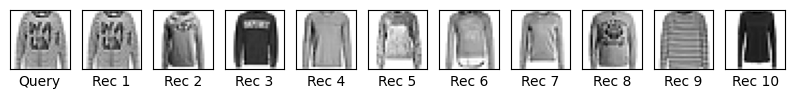

In [32]:
display_recommendations(item_index=500, num_recommendations=10) 

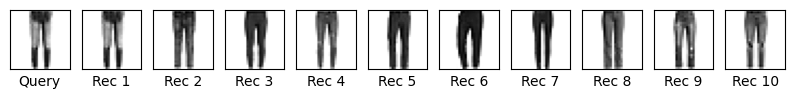

In [33]:
display_recommendations(item_index=3, num_recommendations=10) 

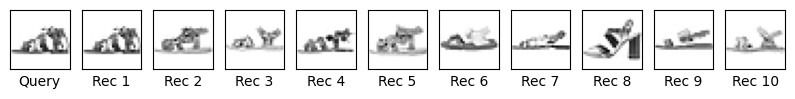

In [34]:
display_recommendations(item_index=11, num_recommendations=10) 

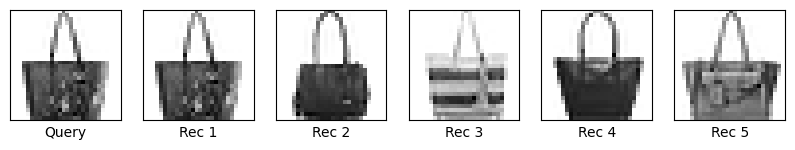

In [35]:
display_recommendations(item_index=256, num_recommendations=5) 

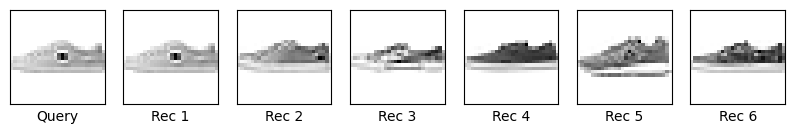

In [41]:
display_recommendations(item_index=603, num_recommendations=6) 